In [1]:
import os

base_path = '/kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset'
print(os.listdir(base_path))
# Sonuç: ['test', 'train', 'valid', 'README.dataset.txt', 'README.roboflow.txt', 'data.yaml']

['data.yaml', 'valid', 'test', 'train']


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [3]:
import os
from ultralytics import YOLO

# Dataset ana yolunu belirt
base_path = '/kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset'

# data.yaml dosyasının yolunu belirt
yaml_path = os.path.join(base_path, 'data.yaml')

# Sonuçların kaydedileceği klasör
save_dir = '/kaggle/working/yolo_output'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
with open(yaml_path, 'r') as f:
    print(f.read())

train: /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/train/images
val: /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/valid/images
test: /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/test/images

nc: 2
names: ["signature", "stamp"]



### Augmentation (Veri Artırma) Parametreleri

Bu kodda, model eğitimi sırasında ılımlı seviyede veri artırma (augmentation) uygulanır.  
Amaç: Modelin farklı varyasyonlara karşı daha dayanıklı ve genelleyici olmasını sağlamak.

- `degrees`: Görsellerde hafif açı ile döndürme.
- `scale`: Rastgele yakınlaştırma/uzaklaştırma.
- `shear`: Hafif eğme/çekiştirme efekti.
- `perspective`: Görselin perspektifini hafifçe bozma.
- `flipud`, `fliplr`: Görselleri yatay ve dikey çevirmeyle artırma.
- `hsv_h`, `hsv_s`, `hsv_v`: Renk ton, doygunluk ve parlaklık değişimi.
- `mosaic`: 4 görselin karışımı ile yeni bir eğitim örneği üretme.
- `mixup`: Farklı görselleri üst üste getirerek veri çeşitliliği.

**Tüm bu parametreler sayesinde model, gerçek hayattaki çeşitliliğe daha iyi uyum sağlar.**

In [ ]:
# Modeli yükle
model = YOLO('yolo11m-seg.pt')  # Veya yolov8s-seg.pt kullanıyorsan onu yaz

# Eğitimi başlat (ılımlı augmentation eklenmiş hali)
results = model.train(
    data=yaml_path,
    epochs=100,        
    imgsz=640,         
    batch=4,          
    task='segment',      
    degrees=5,           # ±5 dereceye kadar rastgele döndürme
    scale=0.5,           # 0.5-1.5 arası rastgele ölçekleme (zoom-in/out)
    shear=1,             # ±1 dereceye kadar shear (eğme)
    perspective=0.0005,  # Çok hafif perspektif bozulması
    flipud=0.1,          # %10 ihtimalle dikey flip (alt-üst çevirme)
    fliplr=0.5,          # %50 ihtimalle yatay flip (sağ-sol çevirme)
    hsv_h=0.015,         # Hafif renk tonu değişimi
    hsv_s=0.5,           # Hafif doygunluk değişimi
    hsv_v=0.4,           # Hafif parlaklık değişimi
    mosaic=1.0,          # Mosaic augmentation açık
    mixup=0.1,           # Hafif mixup (veri karıştırma, %10 ihtimal)
    project='/kaggle/working/yolo_output',
    name='full_runS_aug'
)


100%|██████████| 43.3M/43.3M [00:00<00:00, 207MB/s]


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=full_runS_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.2±0.4 ms, read: 12.4±3.3 MB/s, size: 102.6 KB)


train: Scanning /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/train/labels... 1941 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1941/1941 [00:14<00:00, 133.08it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.7±1.3 MB/s, size: 61.9 KB)


val: Scanning /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/valid/labels... 257 images, 2 backgrounds, 0 corrupt: 100%|██████████| 257/257 [00:01<00:00, 141.28it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_output/full_runS_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_output/full_runS_aug
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.97G      1.969       3.92      2.415      1.859          8        640: 100%|██████████| 486/486 [01:50<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.12it/s]


                   all        257        787      0.494      0.471      0.458      0.295      0.426      0.401      0.348      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.53G      2.135      3.867      2.381      2.003          2        640: 100%|██████████| 486/486 [01:48<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.53it/s]

                   all        257        787      0.474        0.5      0.499      0.311      0.421      0.401      0.373      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.6G        2.1       3.85      2.361      1.955          9        640: 100%|██████████| 486/486 [01:47<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.23it/s]

                   all        257        787      0.436      0.332      0.356      0.227      0.337       0.28       0.26      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


## Eğitim Sonuçlarını Analiz Etme ve Görselleştirme

Bu kod bloğu, YOLO model eğitiminin çıktılarını analiz ve görselleştirme amacıyla kullanılır.

- `results.csv` dosyasından son 5 epoch'un eğitim metrikleri tablo olarak ekrana getirilir.
- `results.png` dosyasından eğitim sürecine ait metrik grafiklerini (loss, precision, recall, mAP gibi) görselleştirir.

> **Kullanım Amacı:**  
> Model eğitiminin başarı durumunu ve metriklerdeki değişimi hızlıca gözlemlemek.

> **Not:**  
> Dosya yolları, kendi çalışma klasör yapına ve model eğitimi sırasında belirlediğin output dizinine göre ayarlanmalıdır.

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,2315.26,1.12573,2.49971,0.79190,1.31317,0.69550,0.71797,0.69707,0.45849,...,0.61006,0.54759,0.25378,1.22865,3.28746,0.92935,1.32810,0.000182,0.000182,0.000182
46,47,2365.19,1.11095,2.44135,0.78692,1.31711,0.69201,0.70802,0.70123,0.46098,...,0.59981,0.55004,0.25385,1.23469,3.21445,0.90812,1.32439,0.000149,0.000149,0.000149
47,48,2415.16,1.09009,2.42713,0.77395,1.29813,0.68250,0.71441,0.69987,0.45976,...,0.62364,0.54347,0.25672,1.23120,3.33335,0.90176,1.31821,0.000116,0.000116,0.000116
48,49,2465.02,1.10667,2.42864,0.77550,1.30166,0.70603,0.72151,0.70531,0.46143,...,0.59648,0.55629,0.25299,1.24353,3.33254,0.90776,1.32603,0.000083,0.000083,0.000083
49,50,2514.87,1.08758,2.40757,0.77542,1.30265,0.69366,0.73271,0.69957,0.46329,...,0.62588,0.54341,0.24891,1.24035,3.34465,0.90029,1.32844,0.000050,0.000050,0.000050


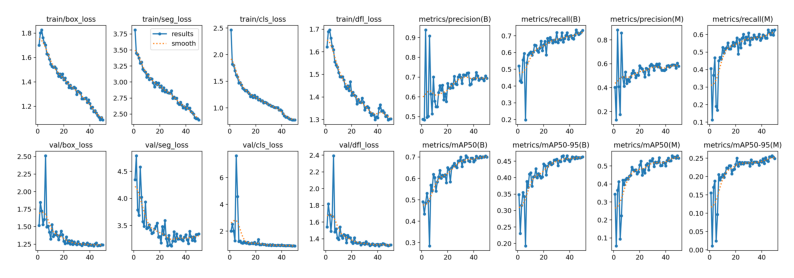

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

output_dir = os.path.join(save_dir, 'full_runS')

# Son 5 epoch metriklerini tablo olarak göster
results_csv = os.path.join(output_dir, 'results.csv')
df = pd.read_csv(results_csv)
display(df.tail())

# Eğitim sonuç grafiklerini görselleştir
results_png = os.path.join(output_dir, 'results.png')
if os.path.exists(results_png):
    img = Image.open(results_png)
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"{results_png} bulunamadı.")

## Model Yükleme ve Test Görsellerinin Hazırlanması

Bu kod bloğu, eğitim sonrası en iyi ağırlık dosyasını (best.pt) yükler  
ve test veri setindeki tüm görsellerin yolunu otomatik olarak bir listeye ekler.

- `YOLO()` ile eğitilmiş model (best.pt) yüklenir.
- Test görsellerinin bulunduğu klasördeki tüm dosyaların tam yolu, `test_images` listesine eklenir.
- Doğru şekilde yüklendiğini kontrol etmek için örnek olarak 5–10 arasındaki görsellerin yolu ekrana yazdırılır.

> **Kullanım Amacı:**  
> Modeli test aşamasına hazırlamak ve hangi görsellerde deneme yapılacağını belirlemek.

In [16]:
from ultralytics import YOLO
import os

# Eğitilmiş modeli yükle
model_path = '/kaggle/working/yolo_output/full_runS/weights/best.pt'
model = YOLO(model_path)

# Test görsellerinin bulunduğu dizini tanımla
test_images_dir = '/kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/test/images'

# Tüm test görsellerinin dosya yolunu listele
test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir)]

# Örnek olarak 5–10 arasındaki test görsellerinin yolunu ekrana yazdır
print(test_images[5:10])


## Test Görsellerinde Model Tahmini ve Sonuçların Görselleştirilmesi

Bu kod bloğu, eğitimli YOLO modelini test görsellerinde çalıştırarak  
segmentasyon veya tespit sonuçlarını görselleştirir.

- Önce ilk test görseli üzerinde model tahmini yapılır ve sonuç hem otomatik hem de notebook ortamında görselleştirilir.
- Daha sonra ilk 5 test görselinin tamamı için, model tahmini alınır ve her birinin sonuçları notebook'ta görsel olarak gösterilir.

> **Kullanım Amacı:**  
> Modelin gerçek veri üzerindeki performansını hızlıca görsel olarak incelemek, tahminlerin doğruluğunu gözle değerlendirmek.


image 1/1 /kaggle/input/signature-stamp-segmentation-dataset/signature_stamp_segmentation_dataset/test/images/peredacha-imushestva-v-bezvozmezdnoe-polzovanie-im-4_jpg.rf.5edc382a6e7fe0a3066ac42bc6b8ce5f.jpg: 640x640 1 signature, 2 stamps, 20.2ms
Speed: 1.5ms preprocess, 20.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


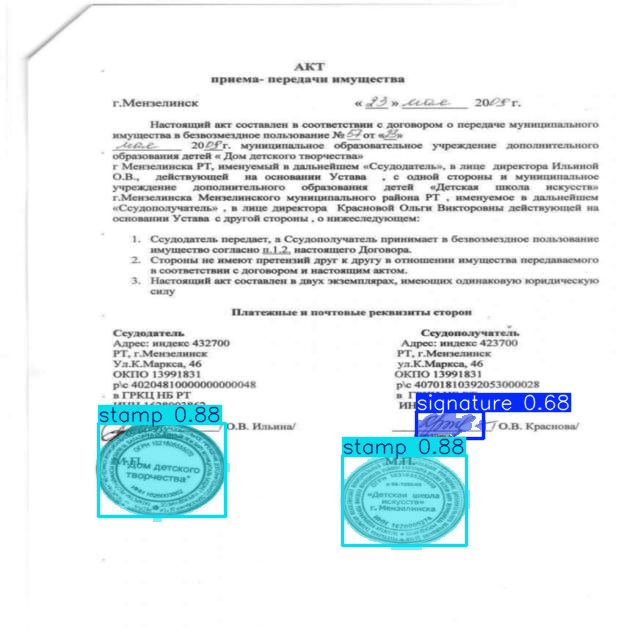

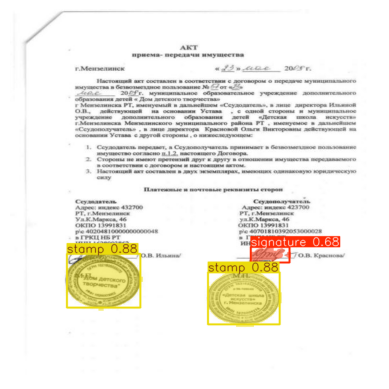

In [18]:
import matplotlib.pyplot as plt
import os

# Tek bir test görselinde tahmin yap ve sonucu görselleştir
img_path = test_images[0]  # İlk test görseli
results = model(img_path)

# Otomatik görselleştirme (Ultralytics fonksiyonu)
results[0].show()

# Alternatif: Görseli doğrudan notebook içinde göstermek
result_img = results[0].plot()  # Sonuçları içeren numpy array
plt.figure(figsize=(7, 7))
plt.imshow(result_img)
plt.axis('off')
plt.title(os.path.basename(img_path))
plt.show()

# İlk 5 test görselinin tahminlerini görselleştir
for img_path in test_images[:5]:
    results = model(img_path)
    result_img = results[0].plot()
    plt.figure(figsize=(7, 7))
    plt.imshow(result_img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()


## **Kısa Özet:**

* **Eğitim sonrası:**

  * **Metrik ve grafik analiziyle** modelin genel başarısı kontrol edildi.
  * **Test aşamasında** model, gerçek örnekler üzerinde çalıştırıldı ve tahmin sonuçları **görsel olarak incelendi**.

## İmza ve Kaşeleri Otomatik Crop ve Yan Yana Gösterme

Bunu otomatikleştirmek için:

* Her test görseli için, **model tahminleri alınır**.
* Her tespit edilen nesne (imza/kaşe), ilgili bölgeye göre **crop yapılır**.
* Belge küçük gösterilir, yanına imza ve kaşe crop'ları küçük boyda eklenir.
* Sonuç tek bir görselde **kolaj olarak gösterilir** (ör: belge + imza + kaşe yan yana).

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

names = model.names

# Kaç tane rastgele görsel gösterilsin?
num_samples = 5

# Rastgele seçilecek görsellerin yolları
random_images = random.sample(test_images, min(num_samples, len(test_images)))

for img_path in random_images:
    results = model(img_path)
    res = results[0]
    img = res.orig_img.copy()

    # Crop listeleri
    signature_crops = []
    stamp_crops = []

    for i, box in enumerate(res.boxes):
        class_id = int(box.cls.cpu().numpy())
        xyxy = box.xyxy.cpu().numpy().astype(int)[0]
        x1, y1, x2, y2 = xyxy
        crop = img[y1:y2, x1:x2]

        if names[class_id] == 'signature':
            signature_crops.append(crop)
        elif names[class_id] == 'stamp':
            stamp_crops.append(crop)

    # Küçük gösterimler için yardımcı fonksiyon
    def small(img, size=(64,64)):
        return cv2.resize(img, size) if img is not None and img.size > 0 else np.zeros((64,64,3), dtype=np.uint8)

    # Kolaj: belge + imzalar + kaşeler
    total_cols = 1 + max(len(signature_crops), 1) + max(len(stamp_crops), 1)
    fig, axs = plt.subplots(1, total_cols, figsize=(3*total_cols, 4))

    # Belge küçük göster
    axs[0].imshow(cv2.resize(img, (128,128)))
    axs[0].set_title('Belge')
    axs[0].axis('off')

    # İmzaları sırala
    for idx in range(max(len(signature_crops),1)):
        if idx < len(signature_crops):
            axs[1+idx].imshow(small(signature_crops[idx]))
            axs[1+idx].set_title(f'İmza {idx+1}')
        else:
            axs[1+idx].imshow(np.zeros((64,64,3), dtype=np.uint8))
            axs[1+idx].set_title('İmza yok')
        axs[1+idx].axis('off')

    # Kaşeleri sırala
    for idx in range(max(len(stamp_crops),1)):
        col = 1 + max(len(signature_crops),1) + idx
        if idx < len(stamp_crops):
            axs[col].imshow(small(stamp_crops[idx]))
            axs[col].set_title(f'Kaşe {idx+1}')
        else:
            axs[col].imshow(np.zeros((64,64,3), dtype=np.uint8))
            axs[col].set_title('Kaşe yok')
        axs[col].axis('off')

    plt.suptitle(os.path.basename(img_path))
    plt.tight_layout()
    plt.show()


## Başarısız Örneklerin Otomatik Analizi

Bu adım, model test aşamasında tespit edilemeyen veya düşük skorla tespit edilen belgeleri otomatik olarak bulmak ve analiz etmek amacıyla eklenmiştir.

- Modelin herhangi bir imza veya kaşe bulamadığı ya da tüm tespitlerin güven skoru belirlenen eşik değerinin altında kaldığı görseller, "başarısız" olarak kabul edilir.
- Bu başarısız örnekler otomatik olarak ayrı bir klasöre kaydedilir ve isimleri bir listeye eklenir.
- Bu yöntemle, modelin hangi belgelerde zorlandığını hızlıca görebilir ve gerekirse bu belgeleri detaylı inceleyerek veri setini veya modeli geliştirebilirsin.

> **Kullanım amacı:** Modelin yetersiz kaldığı örnekleri topluca görmek ve ilerleyen model geliştirme/analiz adımlarında kolayca referans almak.

In [ ]:
import os
import cv2
import numpy as np

# Sonuçları saklamak için klasörler
fail_dir = '/kaggle/working/fail_examples'
os.makedirs(fail_dir, exist_ok=True)

threshold = 0.5  # Örneğin, confidence 0.5'in altında olanlar başarısız kabul edilsin

failed_files = []
for img_path in test_images:
    results = model(img_path)
    res = results[0]
    found = False

    # Kutucuk skorlarını kontrol et
    if res.boxes is not None and len(res.boxes) > 0:
        confs = res.boxes.conf.cpu().numpy()
        # Eğer herhangi bir skor threshold'un üstündeyse found=True
        if np.any(confs > threshold):
            found = True

    # Hiç başarılı tespit yoksa, görseli kaydet ve listeye ekle
    if not found:
        img = cv2.imread(img_path)
        out_name = os.path.join(fail_dir, os.path.basename(img_path))
        cv2.imwrite(out_name, img)
        failed_files.append(img_path)

print(f"
